In [5]:
# Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import accuracy_score

In [6]:
# Dataset

df = pd.read_csv('RELIANCE.csv')
df = df[['Open','High','Low','Close']]
print(df.head())

     Open    High     Low   Close
0  237.50  251.70  237.50  251.70
1  258.40  271.85  251.30  271.85
2  256.65  287.90  256.65  282.50
3  289.00  300.70  289.00  294.35
4  295.00  317.90  293.00  314.55


In [7]:
# Creating custom meaningful Column to predict

df['Open-Close'] = df.Open - df.Close
df['High-Low'] = df.High - df.Low

df =df.dropna()
X = df[['Open-Close','High-Low']]
print(X.head())
Y = np.where(df['Close'].shift(-1) > df['Close'],1,-1) 

   Open-Close  High-Low
0      -14.20     14.20
1      -13.45     20.55
2      -25.85     31.25
3       -5.35     11.70
4      -19.55     24.90


In [8]:
# Train data

split_percent = 0.7
split = int(split_percent*len(df))

x_train = X[:split]
y_train = Y[:split]
x_test = X[split:]
Y_test = Y[split:]

model = linear_model.LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [9]:
#predict signal

df['Predict_signal'] = model.predict(X)
df['Return'] = np.log(df['Close']/df['Close'].shift(1))

Cummulative_return = df[split:]['Return'].cumsum()*100

df['Strategy_return'] = df['Return']*df['Predict_signal'].shift(1)
Cummulative_strategy_return = df[split:]['Strategy_return'].cumsum()*100

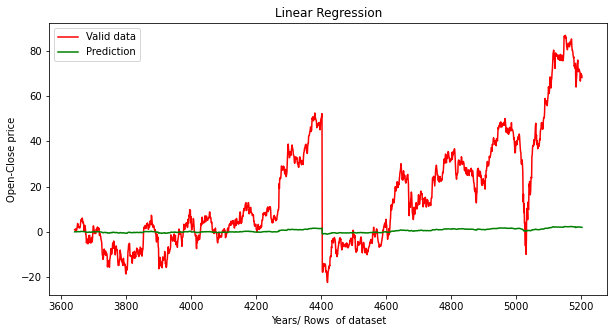

In [10]:
#plotting

plt.figure(figsize=(10,5))
plt.title("Linear Regression")
plt.xlabel("Years/ Rows  of dataset")
plt.ylabel("Open-Close price")
plt.plot(Cummulative_return,color='r',label = 'Valid data')
plt.plot(Cummulative_strategy_return,color = 'g',label = 'Prediction')
plt.legend()
plt.show()